In [2]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [6]:
#Criando nosso DataFrame
df = pd.read_csv("data/application_record.csv")

In [7]:
#Visualizando as 5 primeiras linhas
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [34]:
#Quantidade de linhas e colunas
df.shape

(438557, 18)

In [35]:
#Verificando os tipos de dados
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [36]:
#Verificando se temos dados faltantes
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [37]:
#Verificando os dados da coluna OCCUPATION_TYPE
df.OCCUPATION_TYPE.sample(5)

378629            NaN
290258    Sales staff
396974     Core staff
55897             NaN
284150            NaN
Name: OCCUPATION_TYPE, dtype: object

In [38]:
df.groupby('OCCUPATION_TYPE')['OCCUPATION_TYPE'].count()


OCCUPATION_TYPE
Accountants              15985
Cleaning staff            5845
Cooking staff             8076
Core staff               43007
Drivers                  26090
HR staff                   774
High skill tech staff    17289
IT staff                   604
Laborers                 78240
Low-skill Laborers        2140
Managers                 35487
Medicine staff           13520
Private service staff     3456
Realty agents             1041
Sales staff              41098
Secretaries               2044
Security staff            7993
Waiters/barmen staff      1665
Name: OCCUPATION_TYPE, dtype: int64

In [39]:
# Removendo os dados nulos
df.dropna(axis = 0, inplace=True)

In [40]:
#Verificando se temos dados faltantes
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [41]:
# Checando os ID's duplicados
df['ID'].unique().shape[0] != df['ID'].shape[0]

True

In [42]:
# Removendo os ID's duplicados
df.drop_duplicates('ID', keep='last', inplace=True) 

In [43]:
# Quantos clientes tem carro ?
df['FLAG_OWN_CAR'].value_counts()

N    178230
Y    126101
Name: FLAG_OWN_CAR, dtype: int64

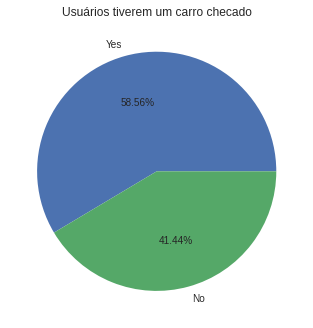

In [44]:
# Gráfico 
plt.pie(df['FLAG_OWN_CAR'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('Usuários tiverem um carro checado')
plt.show()

In [45]:
# Quantos clientes tem alguma propriedade ?
df['FLAG_OWN_REALTY'].value_counts()

Y    207657
N     96674
Name: FLAG_OWN_REALTY, dtype: int64

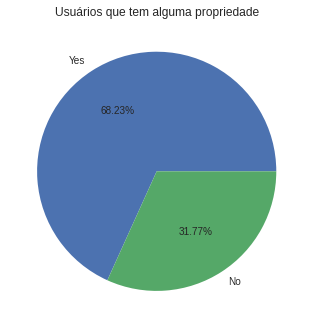

In [46]:
# Gráfico
plt.pie(df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('Usuários que tem alguma propriedade')
plt.show()

In [47]:
#Categoria de renda	
df['NAME_INCOME_TYPE'].value_counts()

Working                 190206
Commercial associate     84002
State servant            29975
Pensioner                  136
Student                     12
Name: NAME_INCOME_TYPE, dtype: int64

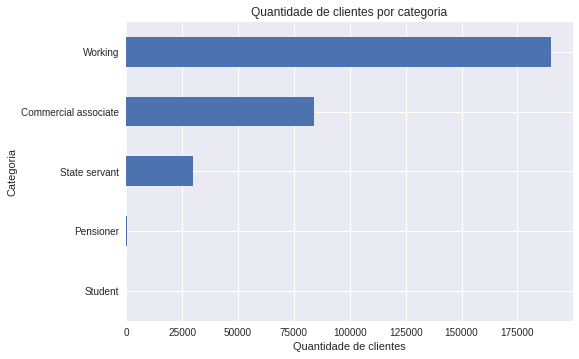

In [48]:
df["NAME_INCOME_TYPE"].value_counts().sort_values(ascending=True).plot.barh(title="Quantidade de clientes por categoria")
plt.xlabel("Quantidade de clientes")
plt.ylabel("Categoria");


In [49]:
#Nível de educação	
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    204779
Higher education                  85655
Incomplete higher                 11633
Lower secondary                    2039
Academic degree                     225
Name: NAME_EDUCATION_TYPE, dtype: int64

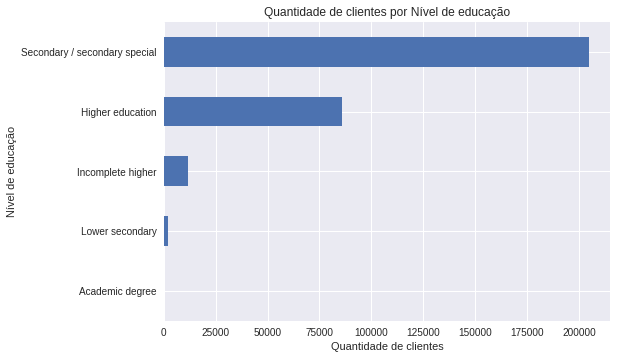

In [50]:
df["NAME_EDUCATION_TYPE"].value_counts().sort_values(ascending=True).plot.barh(title="Quantidade de clientes por Nível de educação")
plt.xlabel("Quantidade de clientes")
plt.ylabel("Nível de educação");

In [51]:
#Estado civil		
df['NAME_FAMILY_STATUS'].value_counts()

Married                 212703
Single / not married     39647
Civil marriage           26799
Separated                18470
Widow                     6712
Name: NAME_FAMILY_STATUS, dtype: int64

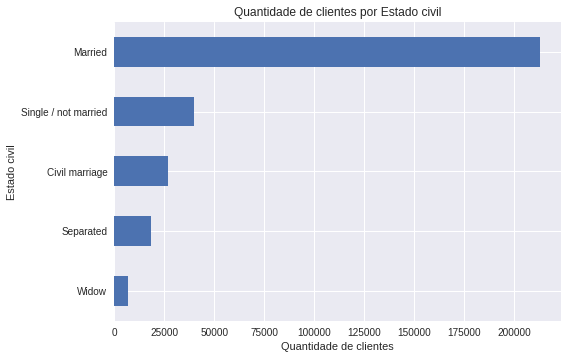

In [52]:
df["NAME_FAMILY_STATUS"].value_counts().sort_values(ascending=True).plot.barh(title="Quantidade de clientes por Estado civil")
plt.xlabel("Quantidade de clientes")
plt.ylabel("Estado civil");

In [53]:
#Número de filhos	
df["CNT_CHILDREN"].describe()

count    304331.000000
mean          0.510967
std           0.765499
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

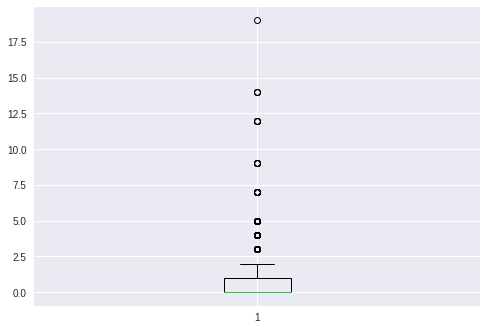

In [54]:
plt.boxplot(df["CNT_CHILDREN"]);

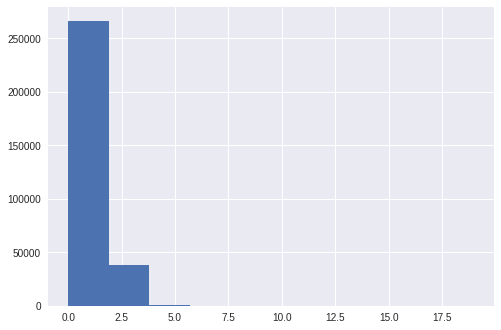

In [55]:
plt.hist(df["CNT_CHILDREN"]);

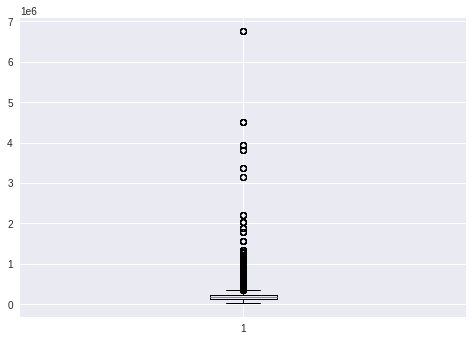

In [56]:
#Rendimento anual	
plt.boxplot(df["AMT_INCOME_TOTAL"]);

In [57]:
df["AMT_INCOME_TOTAL"].describe()

count    3.043310e+05
mean     1.948670e+05
std      1.169674e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

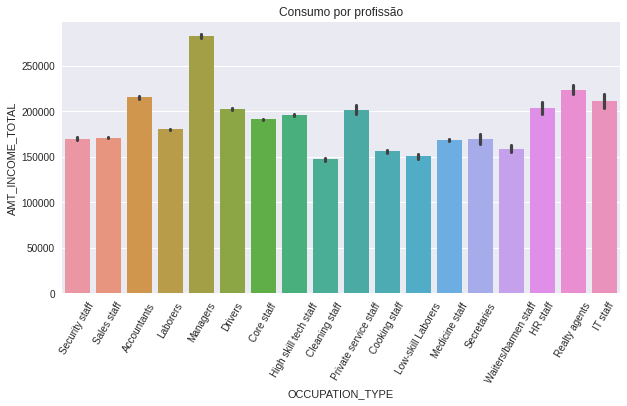

In [58]:
# Consumo por profissão
plt.figure(figsize =(10,5))
ax = sns.barplot(x="OCCUPATION_TYPE", y="AMT_INCOME_TOTAL",data=df).set_title('Consumo por profissão')
plt.xticks(rotation=60)